# Multivariate Linear Regression


## Multiple Features

Linear regression with multiple variables is also known as "multivariate linear regression".

We now introduce notation for equations where we can have any number of input variables.

$$\begin{align*}x_j^{(i)} &= \text{value of feature } j \text{ in the }i^{th}\text{ training example} \newline x^{(i)}& = \text{the input (features) of the }i^{th}\text{ training example} \newline m &= \text{the number of training examples} \newline n &= \text{the number of features} \end{align*}$$

The multivariable form of the hypothesis function accommodating these multiple features is as follows:

$$h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n$$

In order to develop intuition about this function, we can think about $\theta_0$ as the basic price of a house, $\theta_1$ as the price per square meter, $\theta_2$ as the price per floor, etc. $x_1$ will be the number of square meters in the house, $x_2$ the number of floors, etc.

Using the definition of matrix multiplication, our multivariable hypothesis function can be concisely represented as:

$$\begin{align*}h_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x\end{align*}$$

เมื่อ
* $x_0 = 1$
* $\theta\in \mathbb{R}^{n+1}$
* $x\in \mathbb{R}^{n+1}$
* $h_\theta(x) \in \mathbb{R}$


This is a vectorization of our hypothesis function for one training example; see the lessons on vectorization to learn more.

Remark: Note that for convenience reasons in this course we assume $x_{0}^{(i)} =1 \text{ for } (i\in { 1,\dots, m } )$ This allows us to do matrix operations with theta and $x$. Hence making the two vectors '$\theta$' and $x^{(i)}$ match each other element-wise (that is, have the same number of elements: n+1).]

## Gradient Descent for Multiple Variables

The gradient descent equation itself is generally the same form; we just have to repeat it for our 'n' features:

$
\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}
$

In other words:

$
\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \; & \text{for j := 0...n}\newline \rbrace\end{align*}
$

The following image compares gradient descent with one variable to gradient descent with multiple variables:

![](img/15.png)

## Gradient Descent in Practice I - Feature Scaling

***คือการทำให้ Gradient Descent วิ่งเข้าหาจุด Local Minimum ได้ไวมากขึ้น***

We can speed up gradient descent by having each of our input values in roughly the same range. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$-1 \leq x_{(i)} \leq 1$

or

$-0.5 \leq x_{(i)} \leq 0.5$

These aren't exact requirements; we are only trying to speed things up. The goal is to get all input variables into roughly one of these ranges, give or take a few.

Two techniques to help with this are **feature scaling** and **mean normalization**. 

**Feature scaling** involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. 

**Mean normalization** involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. 

To implement both of these techniques, adjust your input values as shown in this formula:

$$x_i := \dfrac{x_i - \mu_i}{s_i}$$

Where 
- $μ_i$ is the average of all the values for feature (i) 
- $s_i$ is the range of values (max - min), or $s_i$ is the standard deviation. ($s_i = x_i^{max} - x_i^{min}$)

*Note that dividing by the range, or dividing by the standard deviation, give different results. The quizzes in this course use range - the programming exercises use standard deviation.*

For example, if $x_i$ represents housing prices with a range of 100 to 2000 and a mean value of 1000, then, 

$$x_i := \dfrac{price-1000}{1900}$$





## Gradient Descent in Practice II - Learning Rate ($\alpha$)

Debugging gradient descent. Make a plot with number of iterations on the x-axis. (iterations คือจำนวน loop ที่ใช้วนเพื่อหาจุดที่ $J(\theta)$ มีค่าน้อยสุด) Now plot the cost function, $J(\theta)$ over the number of iterations of gradient descent. If $J(\theta)$ ever increases, then you probably need to decrease $\alpha$.

Automatic convergence test. Declare convergence if $J(\theta)$ decreases by less than E in one iteration, where E is some small value such as 10−3. However in practice it's difficult to choose this threshold value.

![](img/16.png)

It has been proven that if learning rate α is sufficiently small, then J(θ) will decrease on every iteration.

![](img/17.png)

To summarize:

If $\alpha$ is too small: slow convergence.

If $\alpha$ is too large: ￼may not decrease on every iteration and thus may not converge.

## Features and Polynomial Regression

We can improve our features and the form of our hypothesis function in a couple different ways.

We can **combine** multiple features into one. 

**For example**, we can combine $x_1$ and $x_2$ into a new feature $x_3$ by taking $x_1\cdot x_2$.

### Polynomial Regression

Our hypothesis function need not be linear (a straight line) if that does not fit the data well.

We can **change the behavior or curve** of our hypothesis function by making it a **quadratic, cubic or square root function (or any other form)**.

For example, if our hypothesis function is $h_{\theta}(x) = \theta_0+\theta_1x_1$ then we can create additional features based on $x_1$, to get the quadratic function $h_{\theta}(x) = \theta_0+\theta_1x_1+\theta_2x_1^2$ or the cubic function $h_{\theta}(x) = \theta_0+\theta_1x_1+\theta_2x_1^2+\theta_3x_1^3$

In the cubic version, we have created new features $x_2$ and $x_3$ where $x_2=x^2_1$ and $x_3=x^3_1$.

To make it a square root function, we could do: $h_{\theta}(x) = \theta_0+\theta_1x_1+\theta_2\sqrt{x_1}$

**One important thing to keep in mind is, if you choose your features this way then feature scaling becomes very important.**

eg. if $x_1$ has range 1-1000 then range of $x^2_1$ becomes 1-1000000 and that of $x^3_1$ becomes 1-1000000000


# Computing Parameters Analytically

## Normal Equation

Gradient descent gives one way of minimizing $J$. Let’s discuss a second way of doing so, this time performing the minimization explicitly and without resorting to **an iterative algorithm(algorithm ที่ต้อง loop ซ้ำๆ)**. 

In the **"Normal Equation"** method, we will minimize $J$ by explicitly taking its derivatives with respect to the $\theta_j$’s, and setting them to zero. This allows us to find the optimum theta without iteration. The normal equation formula is given below:

$\theta = (X^T X)^{-1}X^T y$

![](img/18.png)

There is no need to do **feature scaling** with the normal equation. (สำหรับ normal equation method ไม่ต้องใช้ feature scaling)

The following is a comparison of gradient descent and the normal equation:
![](img/19.png)

With the normal equation, computing the inversion has complexity $\mathcal{O}(n^3)$. So if we have a very large number of features, the normal equation will be slow. In practice, when $n$ exceeds 10,000 it might be a good time to go from a normal solution to an iterative process.

## Normal Equation Noninvertibility

When implementing the normal equation in octave we want to use the 'pinv' function rather than 'inv.' 

**The 'pinv' function will give you a value of $\theta$ even if $X^TX$ is not invertible.**

If $X^TX$ is **noninvertible,** the common causes might be having :

* Redundant features, where two features are very closely related (i.e. they are linearly dependent) (มีบาง features ที่ค่าซ้ำซ้อนกัน สามารถเขียนได้ในรูปของความสัมพันธ์เชิงเส้น เช่น $x_2 = 3x_1$)
* Too many features (e.g. m ≤ n มี features เยอะเกินไป คือมากกว่า example ข้อมูลอีก). In this case, delete some features or use **"regularization" (to be explained in a later lesson)**.

Solutions to the above problems include **deleting a feature that is linearly dependent with another or deleting one or more features when there are too many features**.

# <center>================ Code Example ================</center>

### ตัวอย่างข้อมูลสำหรับ  Linear Regression with Multiple Variable

มี independence variable 2 ตัว (x1,x2) และ dependence variable 1 ตัว (y)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# The file ex1data2.txt contains a training set of housing prices in Port-land, Oregon. 
# The first column is the size of the house (in square feet), 
# the second column is the number of bedrooms, and the third column is the price of the house.

data2 = pd.read_csv('programing/machine-learning-ex1/ex1/ex1data2.txt',names=['Size(feet2)','Number of bedrroms','Price($)'])
data2.head()

,Size(feet2),Number of bedrroms,Price($)
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


ตัวแปรต้นคือ Size, Number of bedrooms ส่วน Price เป็นตัวแปรตาม

ก่อนจะเริ่มทำอะไร ลอง visualize ดูความสัมพันธ์ของข้อมูลนี้สักหน่อยว่าเป็นแบบไหน

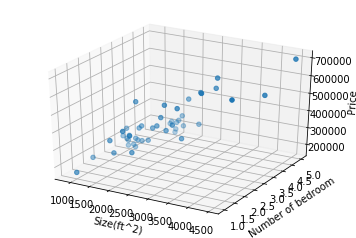

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x1 = data2.values[:,0]
x2 = data2.values[:,1]
y  = data2.values[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)
ax.set_xlabel('Size(ft^2)')
ax.set_ylabel('Number of bedroom')
ax.set_zlabel('Price')
plt.show()

ขนาดห้อง ถ้าเทียบกับจำนวนห้องนอนจะเห็นว่า scale ต่างกันมาก ดังนั้นควรทำ Feature Normalization (ทำเฉพาะกับ input) ก่อน ดังนี้

$$x_i := \dfrac{x_i - \mu_i}{s_i}$$

Where 
- $μ_i$ is the average of all the values for feature (i) 
- $s_i$ is the range of values (max - min), or $s_i$ is the standard deviation. ($s_i = x_i^{max} - x_i^{min}$)

In [3]:
import numpy as np
def featureNormalize(X):
    X = np.array(X)
    Xmean = X.mean()
    Xmin  = X.min()
    Xmax  = X.max()
    Xstd  = X.std()
    Xnorm = (X-Xmean)/Xstd

    return [Xnorm,Xmean,Xstd]

In [4]:
x1 = featureNormalize(x1)[0]
x2 = featureNormalize(x2)[0]

เมื่อเราจะอธิบายข้อมูลด้วย linear model จะได้ $\hat{y}^{(i)}$ (ค่า predict ที่จุด i)
$$h_\theta (x^{(i)}) = \theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + \theta_3 x_3^{(i)} + \cdots + \theta_n x_n^{(i)}$$

$$\begin{align*}h_\theta(x^{(i)}) =\begin{bmatrix}1 \hspace{2em} x_1^{(i)} \hspace{2em} ... \hspace{2em} x_n^{(i)}\end{bmatrix}\begin{bmatrix}\theta_0 \newline \theta_1 \newline \vdots \newline \theta_n\end{bmatrix}= x\theta\end{align*}$$

เมื่อ
* $\theta\in \mathbb{R}^{n+1}$
* $x\in \mathbb{R}^{1x(n+1)}$
* $h_\theta(x) \in \mathbb{R}$

ถ้า dataset เรามี m จุด (มี (x,y,z) m จุด) จะได้

$$\begin{align*}h_\theta(X) =\begin{bmatrix}1 \hspace{2em} x_1^{(1)} \hspace{2em} ... \hspace{2em} x_n^{(1)} \\ 1 \hspace{2em} x_1^{(2)} \hspace{2em} ... \hspace{2em} x_n^{(2)} \\ \vdots \hspace{2em} \vdots \hspace{2em} ... \hspace{2em} \vdots \\ 1 \hspace{2em} x_1^{(m)} \hspace{2em} ... \hspace{2em} x_n^{(m)} \end{bmatrix}\begin{bmatrix}\theta_0 \newline \theta_1 \newline \vdots \newline \theta_n\end{bmatrix}= X\theta\end{align*}$$

In [5]:
ones = np.ones(len(x1))
x1one = np.vstack((ones,x1)) 
X = np.vstack((x1one,x2)).transpose() # --> X variable

หา $\theta$ ได้จาก Gradient Descent ซึ่งต้องหาค่า Cost Function จาก Lesson 2 จะได้

$$ 
J(\theta) = \frac{1}{2m}(X\theta -y)^{T}(X\theta -y)
$$ 

In [10]:
import numpy as np

def computeCost(X,y,theta):
    # COMPUTECOST Compute cost for linear regression
    # J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    # parameter for linear regression to fit the data points in X and y
    X = np.array(X)
    y = np.array(y)
    theta = np.array(theta)
    
    # Initialize some useful values
    m = len(y) # number of training examples
    J = 0
    yhat = X.dot(theta)
    deltaY = yhat-y
    J = (deltaY.transpose().dot(deltaY))/(2*m) 
    return J

In [14]:
computeCost(X,y,[0,0,0])

65591548106.457443

จาก Lesson 2

### Gradient Descent 


$$ \theta_{j} := \theta_{j} − \alpha \frac{∂J(\theta_{0},\theta_{1})}{∂\theta_{j}} $$
where

$j=0,1$ represents the feature index number.

สำหรับ Linear Regression with One Variable จะได้

$$ \theta_{0} := \theta_{0}− \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x_{i})−y_{i}) $$

$$ \theta_{1} := \theta_{1}− \alpha\frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x_{i})−y_{i})x_{i}) $$

การทำ Gradient Descent คือการเริ่มหาค่า $J(\theta)$ (cost function) ที่ค่า $\theta$ ใด $\theta$ หนึ่งก่อน แล้วก็วน(iteration)ทำซ้ำๆปรับค่า $\theta$ ไปเรื่อยๆจนเจอค่า $\theta$ ที่ทำให้ $J(\theta)$ มีค่าน้อยสุด

ดังนั้นในการทำ function GD จะต้องมี input ดังนี้ 
1. input สำหรับใช้กับ `computeCost(X,y,theta)` 
2. $\alpha$ จากสมการข้างบน ใช้ปรับค่า $\theta$
3. จำนวนการทำซ้ำ 


In [12]:
import numpy as np

def gradientDescent(X, y, theta, alpha, num_iters):
    # GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros(num_iters)
    n = len(theta)

    for i in range(num_iters):
        yhat = X.dot(theta)
        deltaY = yhat-y
        new_theta = np.zeros(n)
        
        for j in range(n):
            new_theta[j] = theta[j] - (alpha/m)*sum(deltaY*X[:,j])

        J_history[i] = computeCost(X, y, theta)
        theta = new_theta

    return [theta, J_history]

จากข้อมูลในไฟล์ `ex1data2.txt` ถ้าให้ $\theta$ เริ่มต้นที่ $\begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$ $\alpha = 0.01$ ทำซ้ำ 50 ครั้ง จะได้ Gradient Descent ดังนี้

In [13]:
theta_with_J = gradientDescent(X,y,[0,0,0],0.01,50)

ลอง check ค่าของ Cost Function ที่ได้จาก Gradient Decent ดูว่ามีพฤติกรรมยังไงเทียบกับจำนวน iterations

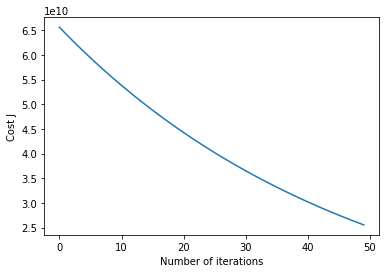

In [15]:
import matplotlib.pyplot as plt

Jtheta = theta_with_J[1]
plt.plot(Jtheta)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

ถ้าลองที่ $\alpha = 0.1$ ทำสัก 100 ครั้ง จะได้

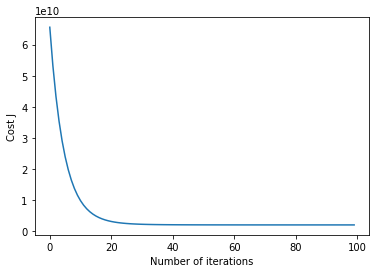

In [20]:
theta_with_J = gradientDescent(X,y,[0,0,0],0.1,100)
Jtheta = theta_with_J[1]
plt.plot(Jtheta)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

จะเห็นว่าลู่เข้าเกือบขนานกับแกน x แล้ว ดูว่าได้ค่า $\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix}$ เท่ากับ

In [22]:
print(theta_with_J[0])

[ 340403.61773803  108803.37852266   -5933.9413402 ]


ทีนี้ลองมาเทียบกับวิธีหาด้วย Normal Equations ดูบ้าง จาก 
$\theta = (X^T X)^{-1}X^T y$ (ผลเฉลยได้มาจากการใช้ Calculus แก้ปัญหา หาค่า $\theta$ ที่ทำให้ Cost Function มีค่าต่ำสุด ซึ่งตรงกับปัญหา Least Mean Square )

In [25]:
from numpy.linalg import inv
nor_theta = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
print(nor_theta)

[ 340412.65957447  109447.79646964   -6578.35485416]


จะเห็นว่าค่าที่ได้จาก Normal Equation ต่างกับ ค่าที่ได้จาก Gradient Descent พอสมควร เลยจะลองเพิ่มจำนวนการทำซ้ำของ GD ดู เป็น 500 จะได้

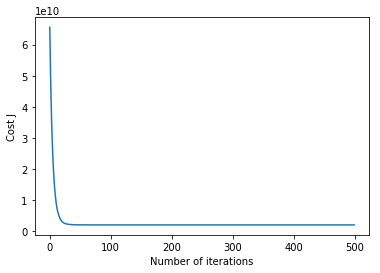

[ 340412.65957447  109447.79645983   -6578.35484435]


In [28]:
theta_with_J = gradientDescent(X,y,[0,0,0],0.1,500)
Jtheta = theta_with_J[1]
plt.plot(Jtheta)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()
print(theta_with_J[0])

จะเห็นว่า $\theta$ ที่ได้จาก GD ต่างกับที่ได้จาก NE นิดเดียว ถ้าทำซ้ำมากกว่านี้ หรือปรับ \alpha ให้มากขึ้นหน่อย น่าจะได้ค่าตรงกันเลย 